In [1]:
import io
import numpy as np
import pandas as pd
import keras
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
weatherdf = pd.read_csv("weatherHistory.csv")
print(weatherdf)

                      Formatted Date        Summary Precip Type  Temperature  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain     9.472222   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain     9.355556   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain     9.377778   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain     8.288889   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain     8.755556   
...                              ...            ...         ...          ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain    26.016667   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain    24.583333   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain    22.038889   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain    21.522222   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain    20.438889   

       Apparent Temperature  Humidity  

In [4]:
training_df = weatherdf[['Apparent Temperature','Temperature', 'Humidity','Wind Speed', 'Visibility','Pressure ']]
print(training_df)

       Apparent Temperature  Temperature  Humidity  Wind Speed  Visibility  \
0                  7.388889     9.472222      0.89     14.1197     15.8263   
1                  7.227778     9.355556      0.86     14.2646     15.8263   
2                  9.377778     9.377778      0.89      3.9284     14.9569   
3                  5.944444     8.288889      0.83     14.1036     15.8263   
4                  6.977778     8.755556      0.83     11.0446     15.8263   
...                     ...          ...       ...         ...         ...   
96448             26.016667    26.016667      0.43     10.9963     16.1000   
96449             24.583333    24.583333      0.48     10.0947     15.5526   
96450             22.038889    22.038889      0.56      8.9838     16.1000   
96451             21.522222    21.522222      0.60     10.5294     16.1000   
96452             20.438889    20.438889      0.61      5.8765     15.5204   

       Pressure   
0        1015.13  
1        1015.63  
2     

In [5]:
#View dataset statistics (to explore and know your data)
#print(training_df.describe())
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 96453




,Apparent Temperature,Temperature,Humidity,Wind Speed,Visibility,Pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,10.855029,11.932678,0.734899,10.810640,10.347325,1003.235956
std,10.696847,9.551546,0.195473,6.913571,4.192123,116.969906
min,-27.716667,-21.822222,0.000000,0.000000,0.000000,0.000000
25%,2.311111,4.688889,0.600000,5.828200,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,14.812000,1021.090000
max,39.344444,39.905556,1.000000,63.852600,16.100000,1046.380000


In [7]:
# Load dataset (assuming your dataset is in a CSV file)


# Count occurrences of 0 hPa
zero_pressure_count = (training_df["Pressure "] == 0).sum()
print(f"Number of rows with 0 hPa: {zero_pressure_count}")

Number of rows with 0 hPa: 1288


In [8]:
training_df["Pressure "] = training_df["Pressure "].replace(0, pd.NA)  # Mark 0s as missing
training_df["Pressure "] = training_df["Pressure "].interpolate(method="linear")  # Fill using linear interpolation

<ipython-input-8-e89cc9aa72a4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-e89cc9aa72a4>:2: FutureWarning:

Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.

<ipython-input-8-e89cc9aa72a4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
print(f"Number of rows with 0 hPa after fixing: {(training_df['Pressure '] == 0).sum()}")

Number of rows with 0 hPa after fixing: 0


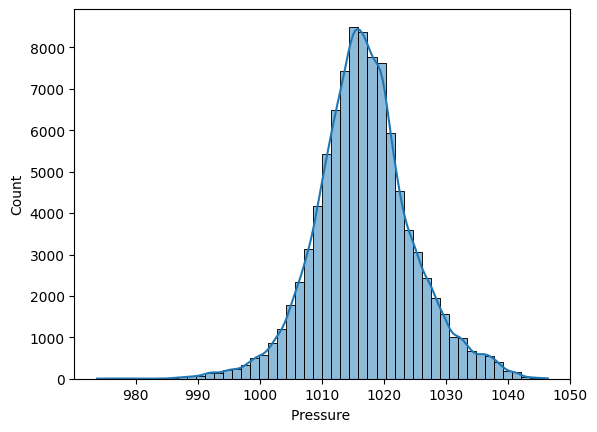

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(training_df["Pressure "], bins=50, kde=True)
plt.show()

In [11]:
# Generate Correlation Matrix(to understand the dependencies of variable on each other in the dataset)
training_df.corr(numeric_only = True)

,Apparent Temperature,Temperature,Humidity,Wind Speed,Visibility
Apparent Temperature,1.000000,0.992629,-0.602571,-0.056650,0.381718
Temperature,0.992629,1.000000,-0.632255,0.008957,0.392847
Humidity,-0.602571,-0.632255,1.000000,-0.224951,-0.369173
Wind Speed,-0.056650,0.008957,-0.224951,1.000000,0.100749
Visibility,0.381718,0.392847,-0.369173,0.100749,1.000000


In [ ]:
#Visualize relationships in dataset
sns.pairplot(training_df, x_vars=["Temperature", "Humidity", "Visibility"], y_vars=["Temperature", "Humidity", "Visibility"])


In [13]:
print(training_df["Pressure "].describe())


count     95165.0
unique     4978.0
top        1017.7
freq        123.0
Name: Pressure , dtype: float64


In [14]:
training_df["Pressure "] = pd.to_numeric(training_df["Pressure "], errors="coerce")  # Convert to float, set errors to NaN

<ipython-input-14-677a9de6aef1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
print(training_df["Pressure "].describe())

count    95165.000000
mean      1016.814140
std          7.778356
min        973.780000
25%       1012.120000
50%       1016.550000
75%       1021.160000
max       1046.380000
Name: Pressure , dtype: float64


In [16]:
# Generate Correlation Matrix(to understand the dependencies of variable on each other in the dataset)
training_df.corr(numeric_only = True)

,Apparent Temperature,Temperature,Humidity,Wind Speed,Visibility,Pressure
Apparent Temperature,1.000000,0.992629,-0.602571,-0.056650,0.381718,-0.288400
Temperature,0.992629,1.000000,-0.632255,0.008957,0.392847,-0.310455
Humidity,-0.602571,-0.632255,1.000000,-0.224951,-0.369173,0.039257
Wind Speed,-0.056650,0.008957,-0.224951,1.000000,0.100749,-0.253700
Visibility,0.381718,0.392847,-0.369173,0.100749,1.000000,-0.166326
Pressure,-0.288400,-0.310455,0.039257,-0.253700,-0.166326,1.000000


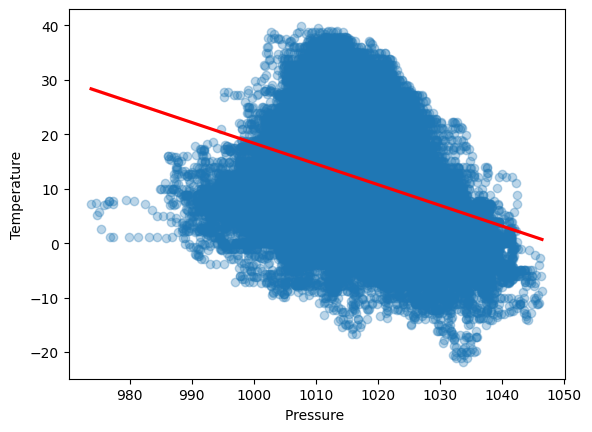

In [18]:
sns.regplot(x=training_df["Pressure "], y=training_df["Temperature"], scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.show()

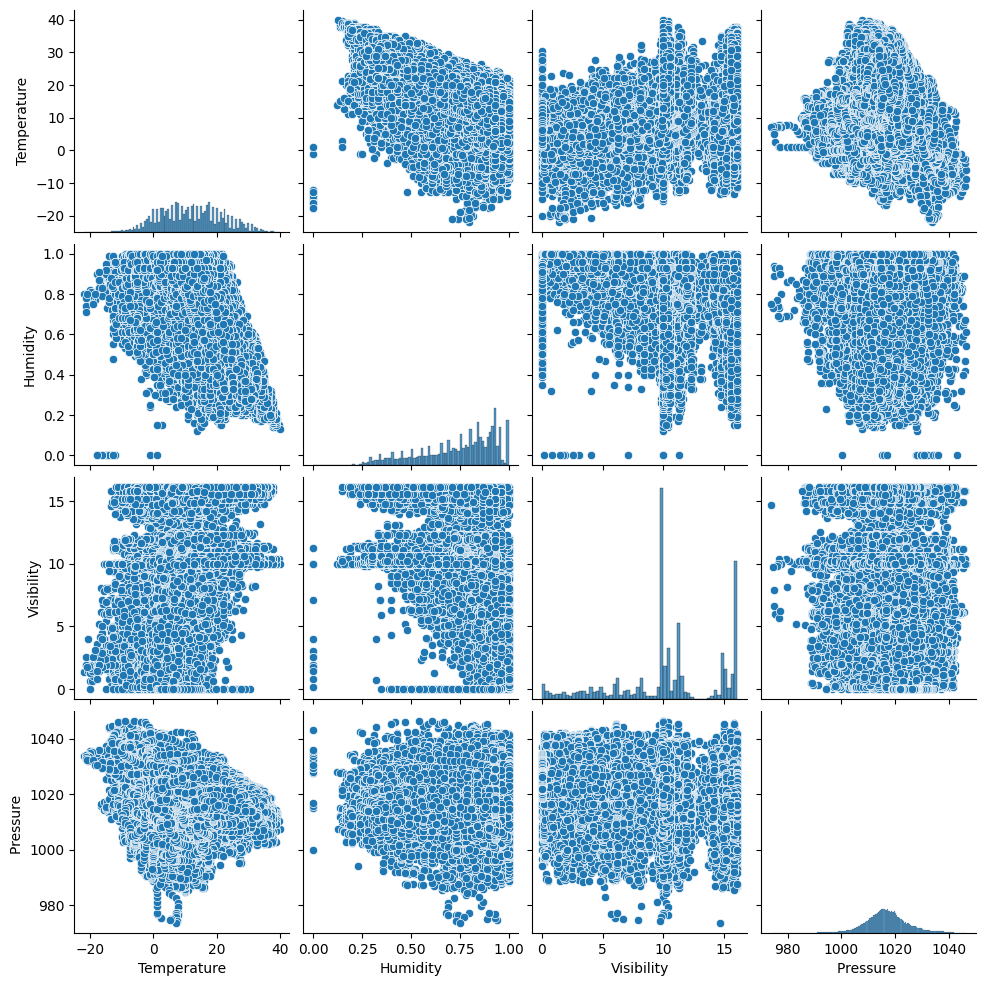

In [19]:
#Visualize relationships in dataset
sns.pairplot(training_df, x_vars=["Temperature", "Humidity", "Visibility","Pressure "], y_vars=["Temperature", "Humidity", "Visibility","Pressure "])

In [20]:

#Train Model
#Step 1= Define Plotting Functions

def make_plots(df, feature_names, label_name, model_output, sample_size=200):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['FARE_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='FARE_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


In [21]:
# Define ML functions
def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = keras.Input(shape=(num_features,))
  outputs = keras.layers.Dense(units=1)(inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, features, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  # input_x = df.iloc[:,1:3].values
  # df[feature]
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, df, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")


SUCCESS: defining linear regression functions complete.


In [22]:
#Train a model with one feature
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['Humidity']
label = 'Temperature'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['Humidity'] and label=Temperature

Epoch 1/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - loss: 241.3762 - root_mean_squared_error: 15.5318
Epoch 2/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - loss: 173.3196 - root_mean_squared_error: 13.1621
Epoch 3/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 130.8598 - root_mean_squared_error: 11.4375
Epoch 4/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - loss: 110.2457 - root_mean_squared_error: 10.4990
Epoch 5/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 3s 949us/step - loss: 103.6153 - root_mean_squared_error: 10.1791
Epoch 6/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 3s 960us/step - loss: 99.9232 - root_mean_squared_error: 9.9961
Epoch 7/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 3s 966us/step - loss: 96.9000 - root_mean_squared_error: 9.8437
Epoch 8/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 94.1144 - root_mean_squared_error: 9.7012
Epoch 9/20
1930/1930 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step - los

In [33]:
training_df = training_df.dropna()  # Remove rows with NaN

In [34]:
print(training_df.isna().sum())  # Check for NaNs
print(training_df.describe())    # Check for weird values (e.g., infinities)

Apparent Temperature    0
Temperature             0
Humidity                0
Wind Speed              0
Visibility              0
Pressure                0
dtype: int64
       Apparent Temperature   Temperature      Humidity    Wind Speed  \
count          95165.000000  95165.000000  95165.000000  95165.000000   
mean              10.878331     11.949284      0.734965     10.784307   
std               10.686240      9.546270      0.195589      6.892106   
min              -27.716667    -21.822222      0.000000      0.000000   
25%                2.338889      4.733333      0.600000      5.812100   
50%               12.038889     12.038889      0.780000      9.917600   
75%               18.838889     18.838889      0.890000     14.119700   
max               39.344444     39.905556      1.000000     63.852600   

         Visibility     Pressure   
count  95165.000000  95165.000000  
mean      10.381889   1016.814140  
std        4.186364      7.778356  
min        0.000000    973.78

In [35]:
learning_rate = 0.01  # Increase LR
epochs = 50           # More training time
batch_size = 128      # Larger batch

model_2 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['Humidity', 'Pressure '] and label=Temperature

Epoch 1/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 10742.8359 - root_mean_squared_error: 87.4182
Epoch 2/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 111.4437 - root_mean_squared_error: 10.5563
Epoch 3/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 106.9555 - root_mean_squared_error: 10.3413
Epoch 4/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 104.6184 - root_mean_squared_error: 10.2270
Epoch 5/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 101.4523 - root_mean_squared_error: 10.0721
Epoch 6/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 98.2510 - root_mean_squared_error: 9.9116  
Epoch 7/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 96.4898 - root_mean_squared_error: 9.8227
Epoch 8/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 95.0191 - root_mean_squared_error: 9.7466  
Epoch 9/50
744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 

In [36]:
def build_batch(df, batch_size):
    batch = df.sample(n=batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace=True)
    return batch

In [37]:
def predict_temperature(model, df, features, label, batch_size=50):
    batch = build_batch(df, batch_size)
    predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

    data = {"PREDICTED_TEMP": [], "OBSERVED_TEMP": [], "L1_LOSS": [],
            features[0]: [], features[1]: []}

    for i in range(batch_size):
        predicted = predicted_values[i][0]
        observed = batch.at[i, label]
        data["PREDICTED_TEMP"].append(round(predicted, 2))
        data["OBSERVED_TEMP"].append(round(observed, 2))
        data["L1_LOSS"].append(round(abs(observed - predicted), 2))
        data[features[0]].append(batch.at[i, features[0]])
        data[features[1]].append(round(batch.at[i, features[1]], 2))

    output_df = pd.DataFrame(data)
    return output_df

def show_predictions(output):
    print("-" * 80)
    print("|" + " TEMPERATURE PREDICTIONS ".center(78) + "|")
    print("-" * 80)
    print(output)
    return


In [43]:
#@title Code - Make predictions

output = predict_temperature(model_2, training_df, features, label)
show_predictions(output)
output_df = predict_temperature(model_2, training_df, features, label)  # Store output
output_df.to_csv("temperature_predictions.csv", index=False)  # Save as CSV

--------------------------------------------------------------------------------
|                           TEMPERATURE PREDICTIONS                            |
--------------------------------------------------------------------------------
    PREDICTED_TEMP  OBSERVED_TEMP  L1_LOSS  Humidity  Pressure 
0        13.750000          -1.81    15.56      0.88    1024.32
1        32.080002          21.11    10.97      0.26    1021.60
2        15.340000          12.57     2.77      0.81    1010.92
3        12.160000          16.69     4.53      0.93    1021.47
4        10.340000           7.20     3.14      0.99    1020.49
5        14.110000          10.07     4.04      0.86    1017.73
6        13.270000           3.36     9.92      0.89    1019.27
7        11.530000          -1.44    12.98      0.95    1020.46
8        15.720000           9.36     6.36      0.81    1021.09
9        17.549999           7.24    10.31      0.75    1022.51
10       14.770000           6.33     8.43      0.84 

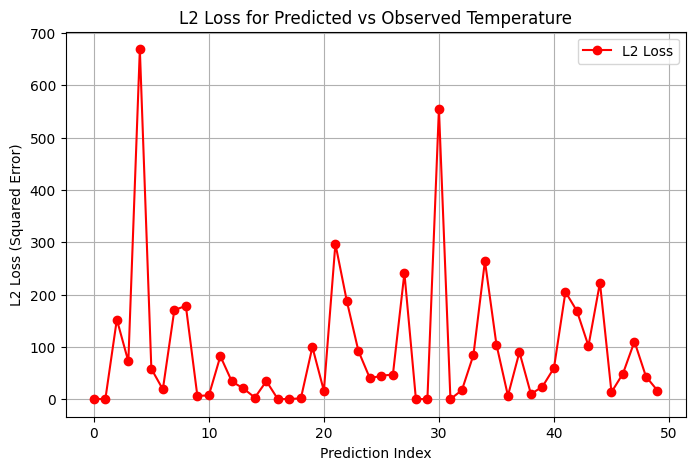

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'output_df' is the DataFrame containing predictions
output_df["L2_LOSS"] = (output_df["OBSERVED_TEMP"] - output_df["PREDICTED_TEMP"])**2

# Plot L2 Loss
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(output_df)), output_df["L2_LOSS"], marker='o', linestyle='-', color='r', label="L2 Loss")

# Labels and Title
plt.xlabel("Prediction Index")
plt.ylabel("L2 Loss (Squared Error)")
plt.title("L2 Loss for Predicted vs Observed Temperature")
plt.legend()
plt.grid()

# Show Plot
plt.show()


In [45]:
from scipy import stats

# Calculate the Z-scores
z_scores = np.abs(stats.zscore(training_df[["Humidity", "Pressure ", "Temperature"]]))

# Define threshold (commonly 3)
threshold = 3
training_df_cleaned = training_df[(z_scores < threshold).all(axis=1)]

print("Original data size:", training_df.shape)
print("Cleaned data size:", training_df_cleaned.shape)


Original data size: (95165, 6)
Cleaned data size: (94381, 6)


In [51]:
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Filtering out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to relevant features
training_df_cleaned = remove_outliers(training_df, "Humidity")
training_df_cleaned = remove_outliers(training_df_cleaned, "Pressure ")
training_df_cleaned = remove_outliers(training_df_cleaned, "Temperature")

print("Original data size:", training_df.shape)
print("Cleaned data size:", training_df_cleaned.shape)


Original data size: (95165, 6)
Cleaned data size: (91802, 6)


In [52]:
learning_rate = 0.01  # Increase LR
epochs = 50           # More training time
batch_size = 128      # Larger batch

model_2 = run_experiment(training_df_cleaned, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['Humidity', 'Pressure '] and label=Temperature

Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - loss: 140706.3438 - root_mean_squared_error: 335.7334
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 109.0710 - root_mean_squared_error: 10.4435
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 104.7955 - root_mean_squared_error: 10.2367
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 101.9126 - root_mean_squared_error: 10.0950
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 100.7054 - root_mean_squared_error: 10.0315  
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 97.7236 - root_mean_squared_error: 9.8842
Epoch 7/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 94.4501 - root_mean_squared_error: 9.7181  
Epoch 8/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 92.7802 - root_mean_squared_error: 9.6311
Epoch 9/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - lo

In [53]:
def build_batch(df, batch_size):
    batch = df.sample(n=batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace=True)
    return batch

In [54]:
def predict_temperature(model, df, features, label, batch_size=50):
    batch = build_batch(df, batch_size)
    predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

    data = {"PREDICTED_TEMP": [], "OBSERVED_TEMP": [], "L1_LOSS": [],
            features[0]: [], features[1]: []}

    for i in range(batch_size):
        predicted = predicted_values[i][0]
        observed = batch.at[i, label]
        data["PREDICTED_TEMP"].append(round(predicted, 2))
        data["OBSERVED_TEMP"].append(round(observed, 2))
        data["L1_LOSS"].append(round(abs(observed - predicted), 2))
        data[features[0]].append(batch.at[i, features[0]])
        data[features[1]].append(round(batch.at[i, features[1]], 2))

    output_df = pd.DataFrame(data)
    return output_df

def show_predictions(output):
    print("-" * 80)
    print("|" + " TEMPERATURE PREDICTIONS ".center(78) + "|")
    print("-" * 80)
    print(output)
    return


In [56]:
output_df = predict_temperature(model_2, training_df, features, label)  # Store output
output_df.to_csv("temperature_predictions.csv", index=False)  # Save as CSV
print(output_df)

    PREDICTED_TEMP  OBSERVED_TEMP  L1_LOSS  Humidity  Pressure 
0            13.79          19.36     5.57      0.43    1006.76
1             2.85           2.78     0.07      0.82    1029.70
2             0.22          17.58    17.36      0.90    1019.51
3            11.72          18.87     7.15      0.52    1029.49
4             0.21          14.03    13.82      0.90    1019.10
5             0.01          16.14    16.13      0.90    1011.43
6            14.54          33.77    19.23      0.41    1013.06
7             2.00          17.69    15.69      0.84    1019.51
8             8.04          24.86    16.82      0.63    1013.25
9             7.62          16.20     8.58      0.65    1019.67
10            3.07           2.28     0.78      0.78     992.46
11           15.58          28.56    12.98      0.37    1007.58
12            5.41           0.11     5.30      0.73    1025.76
13           15.65          22.58     6.93      0.38    1021.57
14            0.78          18.87    18.